# Matplotlib 进阶
## 第二章 - 美图 完善细节
    2.1 画第一幅图
    2.2 图的默认设置
    2.3 设置尺寸和 DPI
    2.4 设置颜色-风格-宽度
    2.5 设置边界
    2.6 设置刻度标签
    2.7 添加图例
    2.8 添加第二幅图
    2.9 两个坐标系 & 两幅子图
    2.10 设置标注
    2.11 设置透明度
    2.12 完善细节
    
本文来自 公众号:王的机器
https://mp.weixin.qq.com/s/b8IAf-liXvgn50-3HwT1VA

# 画第一幅图

### 老板让你 画一幅标准普尔 500 指数在 2007-2010 的走势图。


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

#首先用 pd.read_csv 函数从存好的 S&P500.csv

data = pd.read_csv( 'S&P500.csv', 
                    index_col=0, 
                    parse_dates=True,
                    dayfirst=True )
data.head(3).append(data.tail(3))

# index_col = 0 是说把第一列 Date 当成行标签 (index)
# parse_dates = True 是说把行标签转成 date 对象
# dayFirst = True 是说日期是 DD/MM/YYYY 这样的格式

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,16.660000,1260000
1950-01-04,16.850000,16.850000,16.850000,16.850000,16.850000,1890000
1950-01-05,16.930000,16.930000,16.930000,16.930000,16.930000,2550000
2019-04-22,2898.780029,2909.510010,2896.350098,2907.969971,2907.969971,2997950000
2019-04-23,2909.989990,2936.310059,2908.530029,2933.679932,2933.679932,3635030000
2019-04-24,2934.000000,2936.830078,2926.050049,2927.250000,2927.250000,3448960000


In [14]:
#S&P 500 的数据从 1950 年 1 月 3 号开始，老板只需要 2007 年 1 月 1 日到 2010 年 1 月 1 日的数据。做个切片即可，存储成 spx。
spx = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
spx.head(3).append(spx.tail(3))

,Adj Close
Date,
2007-01-03,1416.599976
2007-01-04,1418.339966
2007-01-05,1409.709961
2009-12-29,1126.199951
2009-12-30,1126.420044
2009-12-31,1115.099976


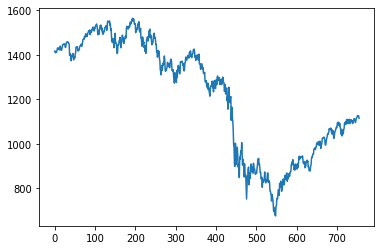

In [15]:
#spx 是个 DataFrame，将它的值一个个画出折线图只需用 plt.plot() 函数，展示在屏幕需用 plt.show()
plt.plot(spx.values)
plt.show()

#在 plot() 函数里面只有变量 y 时 (y = spx.values)，那么自变量就是默认赋值为 range(len(y))。
#此外我们没有设置图的尺寸，像素、线的颜色宽度、坐标轴的刻度和标签、图例、标题等等，所有设置都用的是 matplotlib 的默认设置。

## 这图也太丑了，而且横轴不是日期，我怎么知道金融危机发生在什么时候??

In [16]:
#用 plt.rcParams 可查看上图的所有默认属性 (非常多的属性值)。
plt.rcParams

d:\Ana3\lib\site-packages\IPython\lib\pretty.py:695: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  output = repr(obj)


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

### 看完上面的属性值后，决定在图表尺寸 (figsize)，每英寸像素点 (dpi)，线条颜色 (color)，线条风格 (linestyle)，线条宽度 (linewidth)，横纵轴刻度 (xticks, yticks)，横纵轴边界 (xlim, ylim) 做改进。那就先看看它们的默认属性值是多少。

figure size: [6.0, 4.0]
figure dpi: 72.0
line color: C0
line style: -
line width: 1.5
xticks: [-100.    0.  100.  200.  300.  400.  500.  600.  700.  800.]
yticks: [ 600.  800. 1000. 1200. 1400. 1600. 1800.]
xlim: (-37.75, 792.75)
ylim: (632.0990292500001, 1609.58102375)


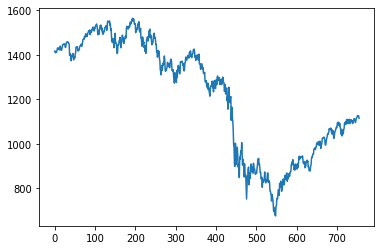

In [17]:
print( 'figure size:', plt.rcParams['figure.figsize'] )
print( 'figure dpi:',plt.rcParams['figure.dpi'] )
print( 'line color:',plt.rcParams['lines.color'] )
print( 'line style:',plt.rcParams['lines.linestyle'] )
print( 'line width:',plt.rcParams['lines.linewidth'] )

#将属性值打印结果和图一起看一目了然。现在我们知道这张图大小是 6×4，每英寸像素有 72 个，线颜色 C0 代表是蓝色，风格 - 是连续线，宽度 1.5，等等。


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot( spx['Adj Close'].values )

print( 'xticks:', ax.get_xticks() )
print( 'yticks:', ax.get_yticks() )
print( 'xlim:', ax.get_xlim() )
print( 'ylim:', ax.get_ylim() )

### 用 figsize 和 dpi 一起可以控制图的大小和像素。
- 函数 figsize(w,h) 决定图的宽和高 (单位是英寸)，而属性 dpi 全称 dots per inches，测量每英寸多少像素。两个属性一起用，那么得到的图的像素为
    (w*dpi, h*dpi)

- 套用在下面代码中，我们其实将图的大小设置成 16×6 平方英寸，而像素设置成 (1600, 600)，因为 dpi = 100。

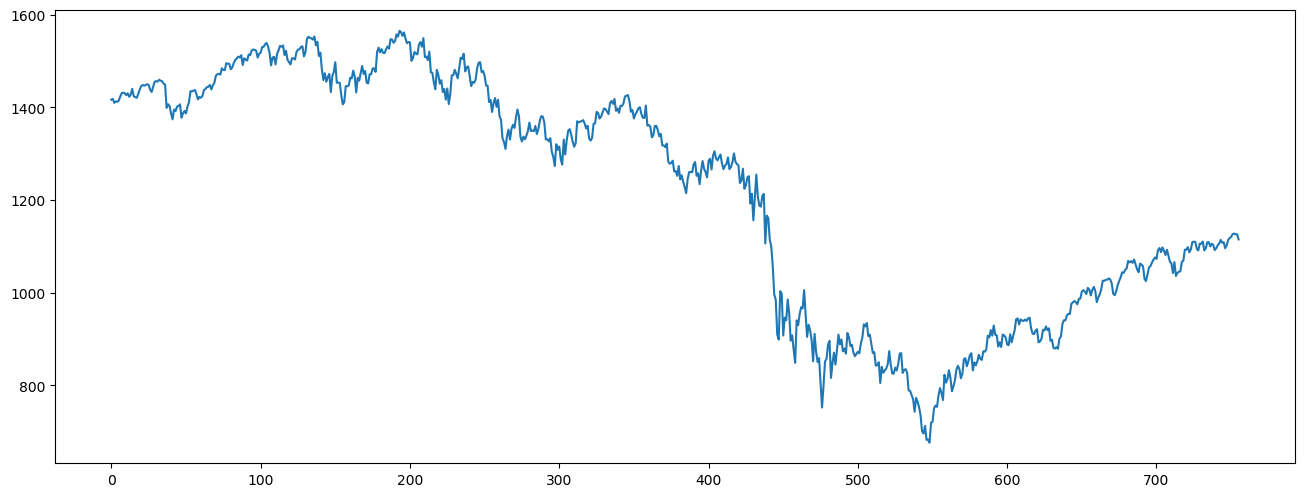

In [18]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values )
plt.show()

- 在 plt.plot() 用 color，linewidth  和 linestyle 属性一起可以控制折线的颜色 、宽度 (2 像素) 和风格 (连续线)。


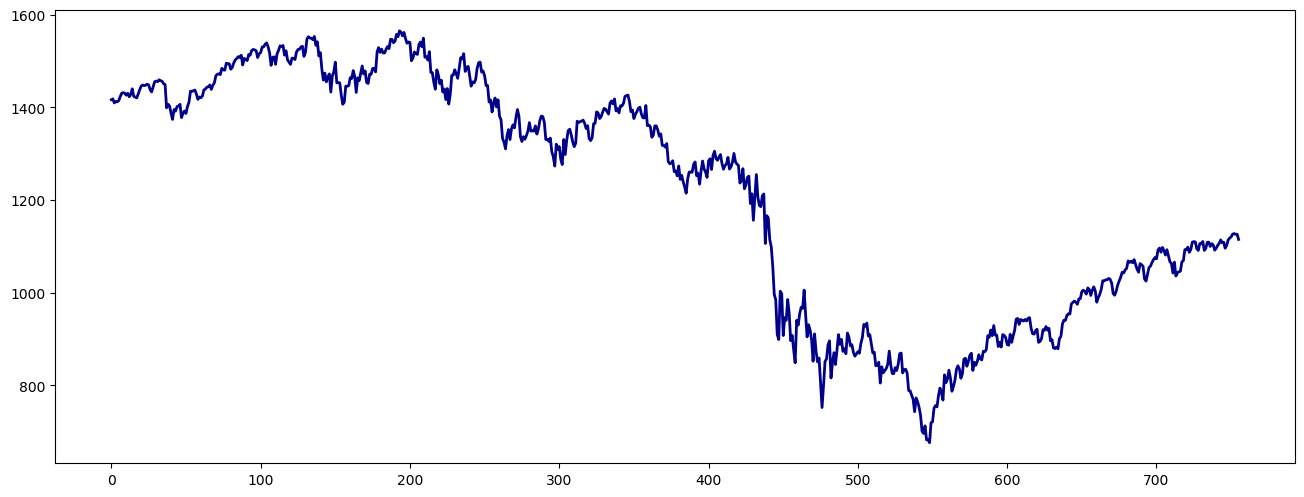

In [19]:
plt.figure( figsize=(16,6), dpi=100 )
plt.plot( spx.values, color='darkblue', linewidth=2, linestyle='-' )
plt.show()

# 要把坐标 改为日期!
- 就需要在axes里面完成
- 下面代码第 2 行在图中 (fig) 添加了一个坐标系 (ax)，然后所有操作都在 ax 里面完成，比如用
    - ax.plot() 来画折线
    - ax.set_xlim(), ax_set_ylim() 来设置横轴和纵轴的边界

(732679.0, 733772.0)

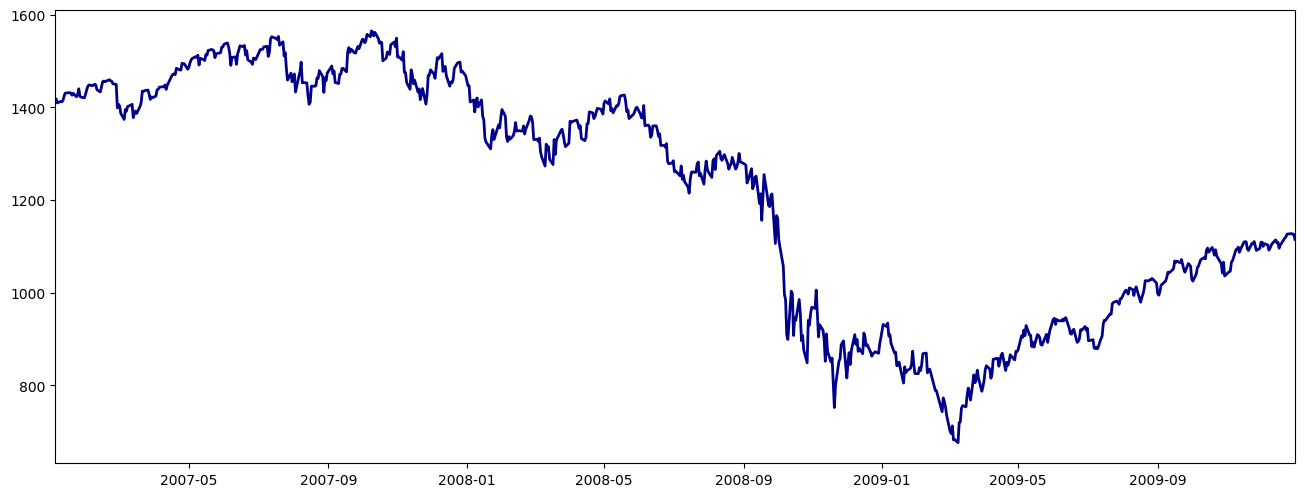

In [20]:
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot()
x = spx.index #日期
y = spx.values

ax.plot( x, y, color='darkblue', linewidth=2, linestyle='-' )

ax.set_xlim([x.min(), x.max() ]) #去除前后空白

# 问题: 横轴日期隔得有点开，而且只有年月，没有日。
- 都是默认设置。为了满足老板的要求，斯蒂文只能手动设置，用以下两个函数：
    - 先用 ax.set_ticks() 设置出数值刻度
    - 再用 ax.set_xticklabels() 在对应的数值刻度上写标签


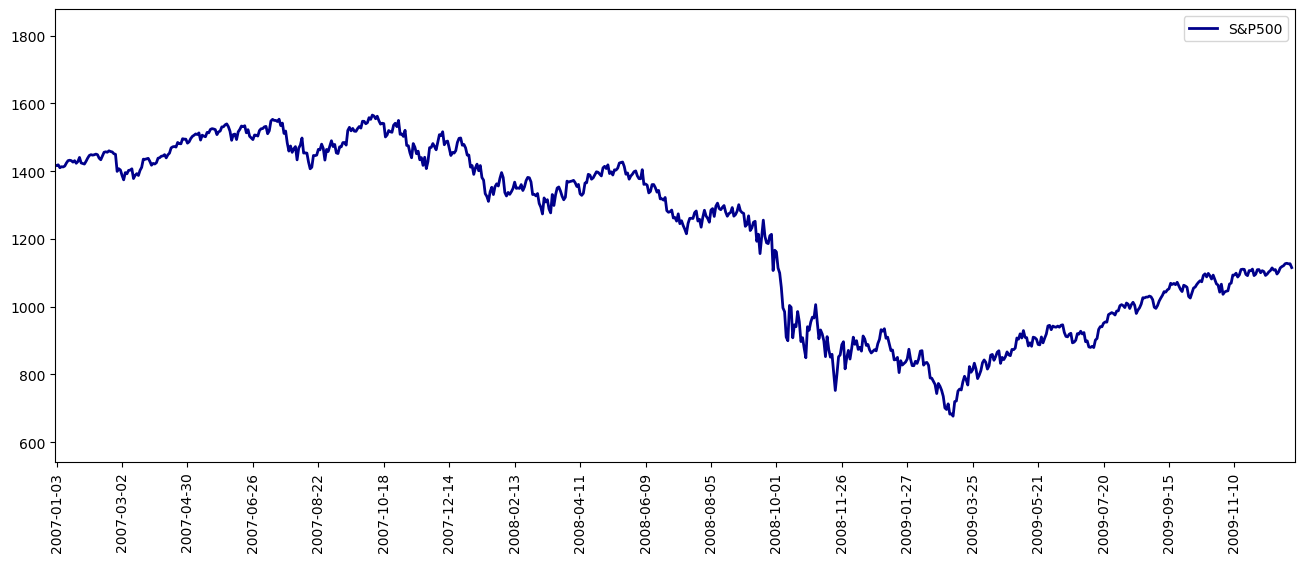

In [21]:
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot()
x = spx.index #日期
y = spx.values

#ax.plot( x, y, color='darkblue', linewidth=2, linestyle='-' )
ax.plot( y, color='darkblue', linewidth=2, linestyle='-',  label = 'S&P500' ) #这里不能用x,x轴重标了, 另外再加上  label = 'S&P500'

ax.legend(loc = 0, frameon=True) #加上框
#ax.set_xlim([x.min(), x.max() ]) #去除前后空白
ax.set_xlim([-1 , len(x) +1 ]) #去除前后空白
ax.set_ylim([y.min()*.8, y.max()*1.2 ]) 

ax.set_xticks( range(0,len(x), 40 ) )
ax.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()]  , rotation=90 )

pass

# 双图合并
**画两条序列，把恐慌指数 VIX 也加进去。**

## 知识点
#### VIX 指数是芝加哥期权交易所 (CBOE) 市场波动率指数的交易代号，常见于衡量 S&P500 指数期权的隐含波动性，通常被称为「恐慌指数」，它是了解市场对未来30天市场波动性预期的一种衡量方法。

由其定义可知，S&P500 指数涨时，VIX 跌，而 S&P500 指数暴跌时，VIX 暴涨。
和之前一样，首先用 pd.read_csv 函数从存好的 VIX.csv 读取数据存成 DataFrame。


In [22]:
data = pd.read_csv( 'VIX.csv', index_col=0, 
                               parse_dates=True,
                               dayfirst=True )
vix = data[['Adj Close']].loc['2007-01-01':'2010-01-01']
vix.head(3).append(vix.tail(3))

,Adj Close
Date,
2007-01-03,12.040000
2007-01-04,11.510000
2007-01-05,12.140000
2009-12-29,20.010000
2009-12-30,19.959999
2009-12-31,21.680000


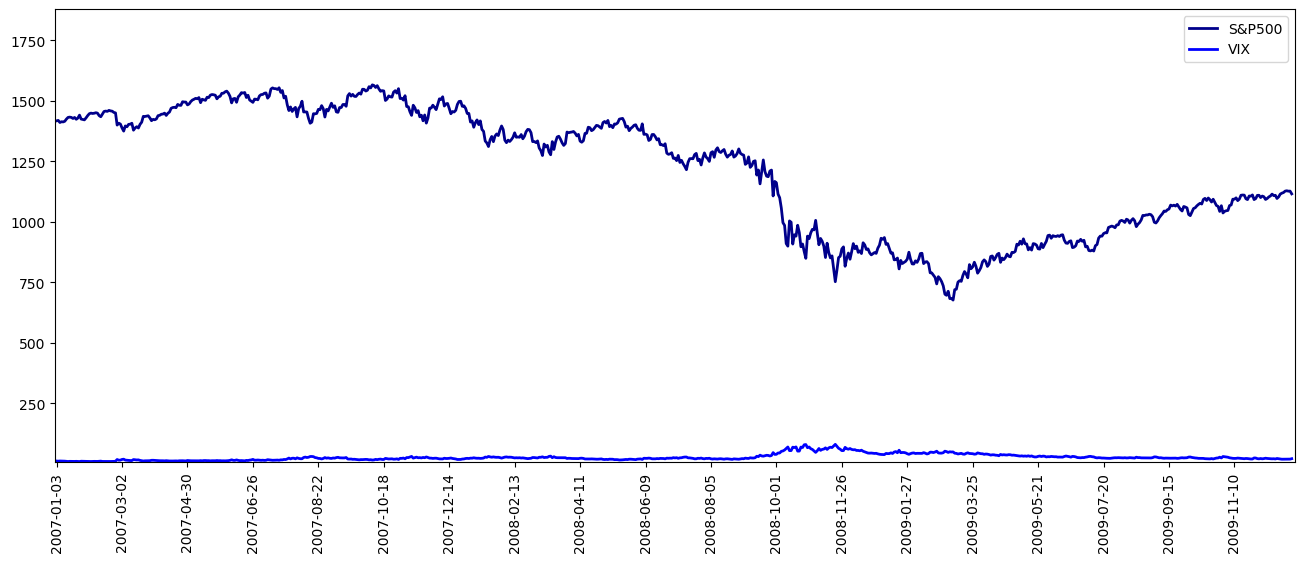

In [23]:
fig = plt.figure( figsize=(16,6), dpi=100 )
ax = fig.add_subplot()
x = spx.index #日期
y1 = spx.values
y2 = vix.values

#ax.plot( x, y, color='darkblue', linewidth=2, linestyle='-' )
ax.plot( y1, color='darkblue', linewidth=2, linestyle='-',  label = 'S&P500' ) #这里不能用x,x轴重标了, 另外再加上  label = 'S&P500'
ax.plot( y2, color='blue', linewidth=2, linestyle='-',  label = 'VIX' ) #这里不能用x,x轴重标了, 另外再加上  label = 'S&P500'

ax.legend(loc = 0, frameon=True) #加上框

#ax.set_xlim([x.min(), x.max() ]) #去除前后空白
ax.set_xlim([-1 , len(x) +1 ]) #去除前后空白
ax.set_ylim([np.vstack([y1,y2]).min()*.8, np.vstack([y1,y2]).max()*1.2 ])  #这里用np vstack 去组合整合

ax.set_xticks( range(0,len(x), 40 ) )
ax.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax.get_xticks()]  , rotation=90 )

pass

## 显然 S&P500 是千位数，而 VIX 是两位数，两者放在一起，那可不是 VIX 就像一条水平线一样。两种改进方式：
    - 用两个坐标系 (two axes)
    - 用两幅子图 (two subplots) 上下切分的子图形式其实还是比较low 
    
## 用两个坐标系 (two axes)

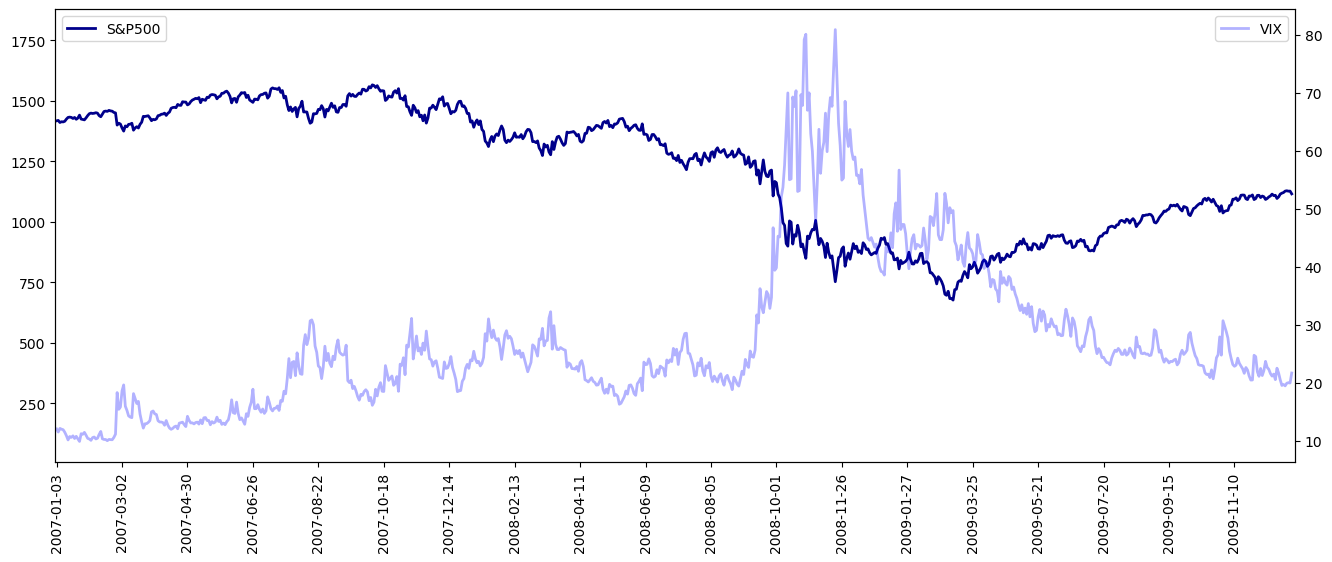

In [24]:
fig = plt.figure( figsize=(16,6), dpi=100 )
ax1 = fig.add_subplot(1,1,1)
x = spx.index #日期
y1 = spx.values
y2 = vix.values

#ax.plot( x, y, color='darkblue', linewidth=2, linestyle='-' )
ax1.plot( y1, color='darkblue', linewidth=2, linestyle='-',  label = 'S&P500' ) #这里不能用x,x轴重标了, 另外再加上  label = 'S&P500'
ax1.legend(loc = 'upper left', frameon=True) #加上框

#ax.set_xlim([x.min(), x.max() ]) #去除前后空白
ax1.set_xlim([-1 , len(x) +1 ]) #去除前后空白
ax1.set_ylim([np.vstack([y1,y2]).min()*.8, np.vstack([y1,y2]).max()*1.2 ])  #这里用np vstack 去组合整合

ax1.set_xticks( range(0,len(x), 40 ) )
ax1.set_xticklabels( [x[i].strftime('%Y-%m-%d') for i in ax1.get_xticks()]  , rotation=90 )

#add a second axes
ax2 = ax1.twinx() 
ax2.plot( y2, color='blue', linewidth=2, linestyle='-',  label = 'VIX', alpha=0.3 )  #alpha=0.3 透明度.  alpha 在 0 和 1 之间，0 是完全透明，1 是完全不透明。
ax2.legend(loc = 'upper right', frameon=True) #加上框

pass

## 两幅子图

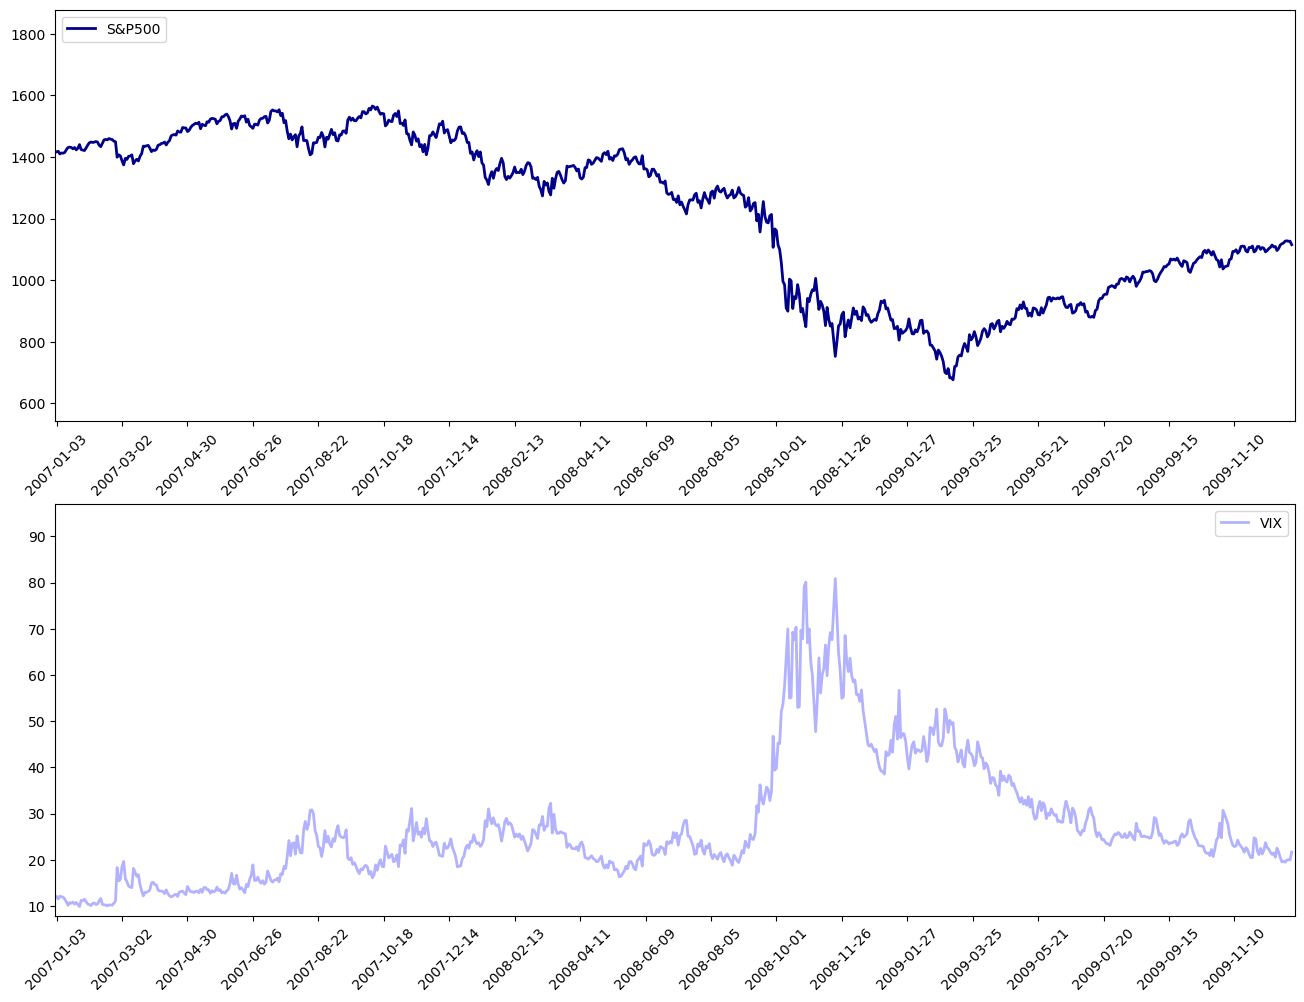

In [25]:
fig = plt.figure( figsize=(16,12), dpi=100 )

#1
plt.subplot(2,1,1)
x = spx.index #日期
y1 = spx.values
#y2 = vix.values

#ax.plot( x, y, color='darkblue', linewidth=2, linestyle='-' )
plt.plot( y1, color='darkblue', linewidth=2, linestyle='-',  label = 'S&P500' ) #这里不能用x,x轴重标了, 另外再加上  label = 'S&P500'
plt.legend(loc = 'upper left', frameon=True) #加上框

#ax.set_xlim([x.min(), x.max() ]) #去除前后空白
plt.xlim([-1 , len(x) +1 ]) #去除前后空白
plt.ylim(y1.min()*.8, y1.max()*1.2 )  


x_tick = range(0,len(x), 40 ) 
x_label =  [x[i].strftime('%Y-%m-%d') for i in x_tick] 
plt.xticks( x_tick, x_label, rotation=45 )

#add a second plot
plt.subplot(2,1,2)
y2 = vix.values

plt.plot( y2, color='blue', linewidth=2, linestyle='-',  label = 'VIX', alpha=0.3 )  #alpha=0.3 透明度.  alpha 在 0 和 1 之间，0 是完全透明，1 是完全不透明。
plt.legend(loc = 'upper right', frameon=True) #加上框

plt.xlim([-1 , len(x) +1 ]) #去除前后空白
plt.ylim(y2.min()*.8, y2.max()*1.2 )  

plt.xticks( x_tick, x_label, rotation=45 )

pass

# 挑战2 Quiz 2
### 制作一幅标准普尔 500 指数 对比 VIX 在 2014-2019 的走势图。建议用两个坐标系 (two axes) 实现

In [26]:
#Your answer here